In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import make_interp_spline, BSpline
from sklearn.linear_model import ElasticNet

$$\frac{-\Big[\frac{-U}{\lambda(2-q)} + 1\Big]^{\frac{1-q}{2-q}}}{\lambda(1-q)}$$

In [2]:
def inverse_cdf(λ, q, U):
    k = -((-U/(λ*(2-q))) + 1)**((1-q)/(2-q))
    return k/(λ*(1-q))

$$(2-q)\lambda e_{q}(-\lambda x)$$

$$e_{q} = [1 + (1 - q)x]^{1/(1-q)}$$

In [3]:
def eq(x):
    return (1 + (1 - q) * x)**(1/(1-q))

def pdf(λ, q, x):
    return (2 - q) * λ * eq(-λ*x)

In [4]:
# Scott's bin size
def bin_width(σ, n):
    return 3.5 * (σ/(n**(1/3)))

def num_of_bins(data):
    σ = np.std(data)
    n = len(data)
    width = bin_width(σ, n)
    return np.ceil((np.max(data) - np.min(data))/ width), width

In [5]:
def histogram(data, bins):
    sorted_data = np.sort(data)
    X = np.unique(sorted_data)
    j = 0
    count = 0
    Px = []
    for i in range(0, X.shape[0], bins):
        X_min = X[i]
        if (i + bins >= X.shape[0]):
            X_max = X.max() + 1
        else:
            X_max = X[i + bins]
        while((j < sorted_data.shape[0]) and (X_min <= sorted_data[j] < X_max)):
            count += 1
            j += 1
        Px.append(count)
        count = 0
    return X[::bins], np.array(Px)/ len(data)

In [45]:
data = np.loadtxt("/home/marcio/qExp13_2.txt", delimiter=',')

In [50]:
X, Px = histogram(data, 1)

In [51]:
λ = 2
q = 1.000000001
# X = np.linspace(0,1000, 100)
fx = pdf(λ, q, X)

In [52]:
X

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

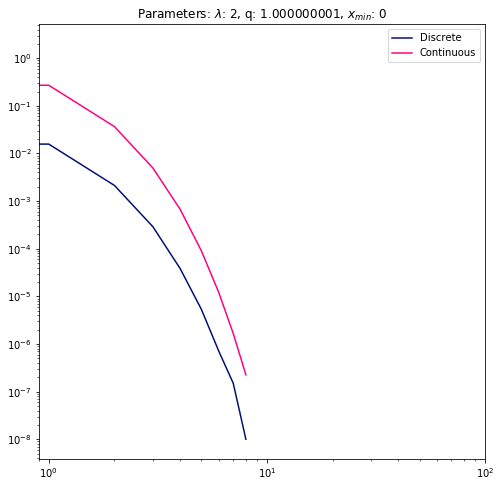

In [56]:
# plot it!
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(X, Px, color='#001072', label='Discrete')
plt.title("Parameters: $\lambda$: " + str(λ) + ", q: " + str(q) + ", $x_{min}$: 0")
ax.plot(X, fx, color='#FF007F', label='Continuous')
ax.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(0, 100)
plt.savefig("img2.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')
plt.show()

In [ ]:
4/3

In [ ]:
hist, bins = np.histogram(data, 10000)

In [ ]:
hist

In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

In [ ]:
Px = np.array(Px)

In [ ]:
Px/len(Px)

In [ ]:
# plt.plot(bins[:-1], hist);
plt.plot(X, Px);
plt.plot(X, pdf(λ, q, X))
plt.xscale('log')
plt.yscale('log')
plt.xlim(0, 100)

In [ ]:
U = np.random.uniform(0,1,10000000)
λ = 2
q = 1.3

In [ ]:
A_ = inverse_cdf(λ, q, U)

In [ ]:
A_sorted = np.sort(A)

In [ ]:
[i*10 for i in range(20//10 + 1)]

In [ ]:
X.max()

In [ ]:
count = 0
X = np.array([0])
P = np.array([])
n = 100
for i in range(X):
    while

In [ ]:
widths

In [ ]:
b = np.linspace(0,9, 10)
w = (b[1:] - b[:-1])

In [ ]:
len(b)

In [ ]:
data = A
# log-scaled bins
bins = np.logspace(0, 3, 50)
widths = (bins[1:] - bins[:-1])

In [ ]:
bins

In [ ]:
# Calculate histogram
discrete = np.histogram(data, bins=bins)

In [ ]:
discrete

In [ ]:
λ = 2
q = 1.3
continuous = pdf(λ, q, np.linspace(0, 1000000000, discrete[0].shape[0]))

In [ ]:
continuous

In [ ]:
np.linspace(0, 1000000000, discrete[0].shape[0])

In [ ]:
continuous

In [ ]:
# normalize by bin width
discrete_norm = discrete[0]/widths
continuous
# values_norm2 = values2[:-1]/widths

In [ ]:
result = np.where(discrete_norm == 0)
discrete_norm_w0 = np.delete(discrete_norm, result)
bins_w0 = np.delete(bins[:-1], result)
# xnew = np.linspace(0,bins_del.max(),300)
# spl = make_interp_spline(bins_del, hist_norm_del, k=3)
# f = UnivariateSpline(bins_del, hist_norm_del, s=n)

In [ ]:
# plot it!
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111) 
ax.plot(bins[:-1], discrete[0], alpha=0.3, color='#001072')
# ax.plot(bins_w0, discrete_norm_w0, color='#001072', label='Discrete')
plt.title("Parâmetros: $\lambda$: " + str(λ) + ", q: " + str(q) + ", $x_{min}$: 0")
ax.plot(bins[:-1], continuous, color='#FF007F', label='Continuous')
# ax.plot(bins[:-1], values_norm2)
ax.legend()
plt.xscale('log')
plt.yscale('log')
plt.savefig("Observ4.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')
plt.show()

In [ ]:
np.logspace(0, 3, 50)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

# We shall draw millions of samples from a Zipf distribution.  Using linear 
# bins this is too much data for a fast and attactive plot.

# Generator for zipfian data
X = (np.random.zipf(1.5) for _ in range(0, 5000000))
X = A
# Expected range of values
MIN_VALUE = 1
MAX_VALUE = 2.0 ** 64

# Log base we shall be using though-out
XBASE = 2
YBASE = 10

# Calculate the min and max powers:
start_power = np.floor(np.log(MIN_VALUE) / np.log(XBASE))
end_power = np.ceil(np.log(MAX_VALUE) / np.log(XBASE))
# ...and number of whole integer powers in that range
num_bins = (end_power - start_power) + 1

#  Generated a range of delimiters in log space
bins = np.logspace(start_power, end_power, num_bins, base=XBASE)

#  Iteratively generate the the histogram in 1k chunks
hist = np.zeros(len(bins) - 1)
while True:
    chunk = list(it.islice(X, 1000))
    if len(chunk) == 0: break
    (tmp,_) = np.histogram(chunk, bins=bins)
    hist += tmp

# Slice all the empty bins of the end
last_idx = max([i for i,h in enumerate(hist) if h])
(hist, bins) = (hist[:last_idx+1], bins[:last_idx+2])

#  Plot for great justice!
fig = plt.figure()

# A loglog plot
ax = fig.add_subplot(211)
plt.loglog(bins[:-1], hist, 'x-', basey=YBASE, basex=XBASE)

# A linear plot of 95% of the mass
ax = fig.add_subplot(212)
pp = max([i for i,x in enumerate((np.cumsum(hist) / sum(hist)) < 0.95) if x])
plt.bar( bins[:-1] - bins[0], hist, width=bins[1:] - bins[:-1])
plt.gca().set_xlim(0, XBASE ** pp  )

plt.show()

In [ ]:
plt.hist(A, bins=100, log=True, range=(1,3));

In [ ]:
H,X1 = np.histogram(BF, bins = 10, normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
plt.plot(X1[1:], F1)
plt.show()

In [ ]:
H,X1 = np.histogram(A, bins = 10, normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
plt.plot(X1[1:], F1)
plt.show()